In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
color=sns.color_palette()
sns.set_style('darkgrid')
pd.set_option('display.float_format',lambda x: '{:.3f}'.format(x))
%matplotlib inline

In [3]:
dataset=pd.read_csv('C:/Users/80667/Desktop/文件/ИУ5/研一下/MMO/数据集/葡萄酒质量数据集/WineQT.csv')
df=dataset.dropna()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 125.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5,0
1,7.800,0.880,0.000,2.600,0.098,25.000,67.000,0.997,3.200,0.680,9.800,5,1
2,7.800,0.760,0.040,2.300,0.092,15.000,54.000,0.997,3.260,0.650,9.800,5,2
3,11.200,0.280,0.560,1.900,0.075,17.000,60.000,0.998,3.160,0.580,9.800,6,3
4,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5,4


In [19]:
X=dataset.drop(labels=['quality'],axis=1)
y=dataset.quality

In [20]:
X.shape

(1143, 12)

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

Text(0, 0.5, 'Взаимная информация')

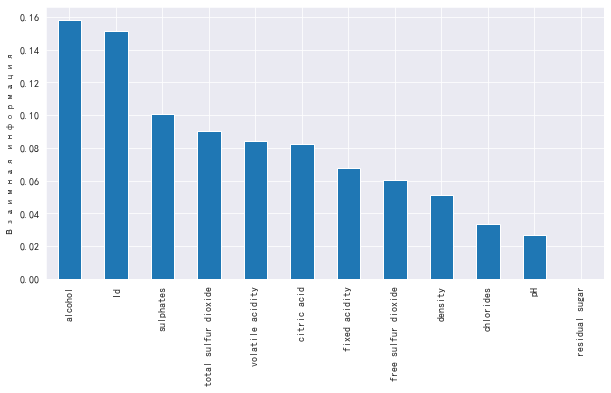

In [22]:
mi = mutual_info_regression(X,y)
mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False).plot.bar(figsize=(10,5))
plt.ylabel('Взаимная информация')

Задача18

<AxesSubplot:xlabel='pH', ylabel='alcohol'>

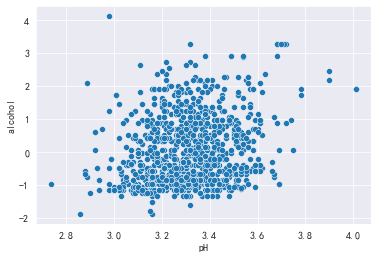

In [23]:
import sklearn.preprocessing
scaler=sklearn.preprocessing.StandardScaler()
df['alcohol']=scaler.fit_transform(df['alcohol'].values.reshape(-1,1))
sns.scatterplot(x='pH',y='alcohol',data=df)

Задача38

In [24]:
selector=SelectKBest(mutual_info_regression,k=10)
selector.fit(X,y)
X_selected=selector.transform(X)
X_selected.shape

(1143, 10)

In [25]:
selector.get_support(indices=False)

array([ True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True])

In [26]:
X.columns[selector.get_support()]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates',
       'alcohol', 'Id'],
      dtype='object')

Признаки, выбранные серектором:'fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH','sulphates', 'alcohol'

<AxesSubplot:>

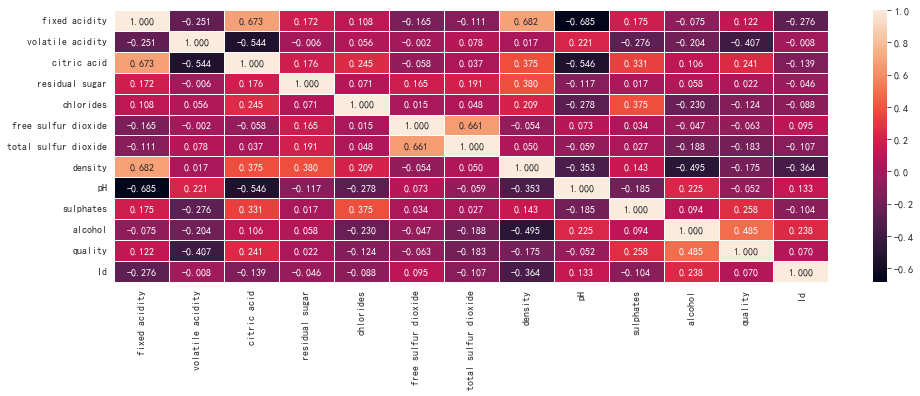

In [28]:
plt.figure(figsize = (16,5))
sns.heatmap(dataset.corr(), annot=True, linewidth=1,fmt='.3f')

Корреляция каждого признака с качеством